# EDA

In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## TN + TMDB

In [3]:
tmdb = pd.read_csv('../data/final/tn_tmdb_final.csv')
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1900 non-null   object 
 1   title              1900 non-null   object 
 2   production_budget  1900 non-null   int64  
 3   worldwide_gross    1900 non-null   int64  
 4   premiere_year      1900 non-null   int64  
 5   day                1900 non-null   int64  
 6   original_language  1900 non-null   object 
 7   ROI                1900 non-null   float64
 8   Action             1900 non-null   int64  
 9   Adventure          1900 non-null   int64  
 10  Animation          1900 non-null   int64  
 11  Comedy             1900 non-null   int64  
 12  Crime              1900 non-null   int64  
 13  Documentary        1900 non-null   int64  
 14  Drama              1900 non-null   int64  
 15  Family             1900 non-null   int64  
 16  Fantasy            1900 

### Genres as X and ROI as y

In [63]:
y_1 = tmdb['ROI']
X_1 = tmdb.drop(columns=['ROI', 'worldwide_gross', 'production_budget', 'release_date', 'title', 'original_language', 'day', 'premiere_year', 'premiere_month_1', 'premiere_month_2', 'premiere_month_3', 'premiere_month_4', 'premiere_month_5', 'premiere_month_6',
'premiere_month_7', 'premiere_month_8', 'premiere_month_9', 'premiere_month_10', 'premiere_month_11', 'premiere_month_12'])

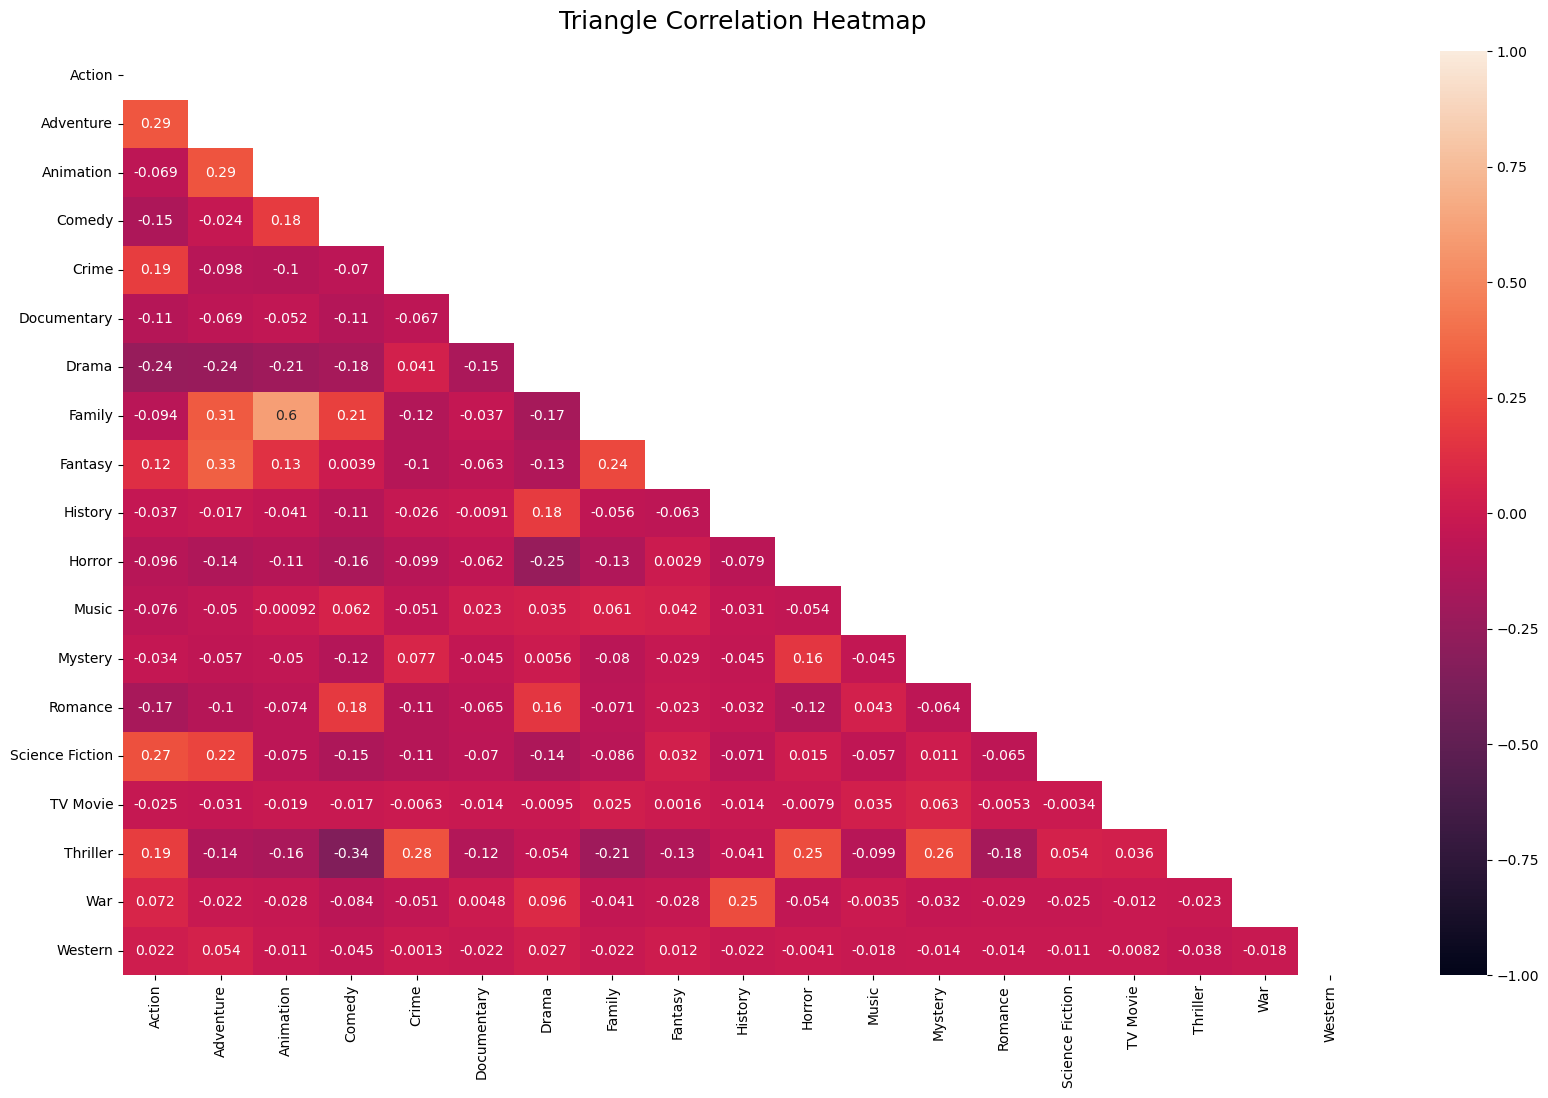

In [64]:
plt.figure(figsize=(20, 12))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(X_1.corr(), dtype=bool))
heatmap = sns.heatmap(X_1.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [65]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Action           1900 non-null   int64
 1   Adventure        1900 non-null   int64
 2   Animation        1900 non-null   int64
 3   Comedy           1900 non-null   int64
 4   Crime            1900 non-null   int64
 5   Documentary      1900 non-null   int64
 6   Drama            1900 non-null   int64
 7   Family           1900 non-null   int64
 8   Fantasy          1900 non-null   int64
 9   History          1900 non-null   int64
 10  Horror           1900 non-null   int64
 11  Music            1900 non-null   int64
 12  Mystery          1900 non-null   int64
 13  Romance          1900 non-null   int64
 14  Science Fiction  1900 non-null   int64
 15  TV Movie         1900 non-null   int64
 16  Thriller         1900 non-null   int64
 17  War              1900 non-null   int64
 18  Western 

In [51]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_1)
scaled_df = pd.DataFrame(scaled_data, columns=X_1.columns)

In [67]:
X_1_augmented = sm.add_constant(X_1)
X_1_augmented

,const,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1896,1.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1897,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1898,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [68]:
tmdb_regression = sm.OLS(y_1, X_1_augmented).fit()

In [69]:
print(tmdb_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROI   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.372
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           0.000748
Time:                        17:35:38   Log-Likelihood:                -7298.0
No. Observations:                1900   AIC:                         1.464e+04
Df Residuals:                    1880   BIC:                         1.475e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.8749      0.784     

In [43]:
tmdb_regression.rsquared_adj

0.055586326813242826

### Premiere months as X and ROI as y

In [70]:
y_2 = tmdb['ROI']
X_2 = tmdb.drop(columns=['ROI', 'worldwide_gross', 'production_budget', 'release_date', 'title', 'original_language', 'day', 'premiere_year', 'Action', 
'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 
'War', 'Western'])

In [71]:
X_2_augmented = sm.add_constant(X_2)
X_2_augmented

,const,premiere_month_1,premiere_month_2,premiere_month_3,premiere_month_4,premiere_month_5,premiere_month_6,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12
0,1.0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,0,0,0,0,1,0,0,0,0,0,0,0
2,1.0,0,0,0,0,1,0,0,0,0,0,0,0
3,1.0,0,0,0,1,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,1.0,0,0,0,0,0,0,0,0,1,0,0,0
1896,1.0,0,0,0,1,0,0,0,0,0,0,0,0
1897,1.0,0,0,0,0,0,0,0,0,0,0,0,1
1898,1.0,1,0,0,0,0,0,0,0,0,0,0,0


In [77]:
tmdb_regression_2 = sm.OLS(y_2, X_2_augmented.astype(float)).fit()

In [78]:
tmdb_regression_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ROI   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.603
Date:                Wed, 02 Oct 2024   Prob (F-statistic):             0.0841
Time:                        17:41:07   Log-Likelihood:                -7310.9
No. Observations:                1900   AIC:                         1.465e+04
Df Residuals:                    1887   BIC:                         1.472e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.062e+12   1.63e+13      0.311      0.756   -2.69e+13     3.7e+13
premiere_month_1  -5.062e+12   1.63e+13     -0.311      0.756    -3.7e+13    2.69e+13
premiere_month_2  -5.062e+12   1.63e+13     -0.311      0.756    -3.7e+13    2.69e+13
premiere_month_3  -5.062e+12   1.63e+13     -0.311      0.756    -3.7e+13    2.69e+13
premiere_month_4  -5.062e+12   1.63e+13     -0.311      0.756    -3.7e+13    2.69e+13
premiere_month_5  -5.062e+12   1.63e+13     -0.311      0.756    -3.7e+13    2.69e+13
premiere_month_6  -5.062e+12   1.63e+13     -0.311      0.756    -3.7e+13    2.69e+13
premiere_month_7  -5.062e+12   1.63e+13     -0.311      0.756    -3.7e+13    2.69e+13
premiere_month_8  -5.062e+12   1.63e+13     -0.311      0.756    -3.7e+13    2.69e+13
premiere_month_9  -5.062e+12   1.63e+13     -0.311      0.756    -3.7e+13    2.69e+13
premiere_month_10 -5.062e+12   1.63e+13     -0.311      0.756    -3.7e+13    2.69e+13
premiere_month_11 -5.062e+12   1.63e+13     -0.311      0.756    -3.7e+13    2.69e+13
premiere_month_12 -5.062e+12   1.63e+13     -0.311      0.756    -3.7e+13    2.69e+13
==============================================================================
Omnibus:                     4737.925   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         64252202.422
Skew:                          25.961   Prob(JB):                         0.00
Kurtosis:                     902.395   Cond. No.                     2.34e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.75e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [82]:
y_3 = tmdb['ROI']
X_3 = tmdb.drop(columns=['ROI', 'release_date', 'title', 'original_language', 'day', 'premiere_year', 'worldwide_gross', 'production_budget'])

In [83]:
X_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Action             1900 non-null   int64
 1   Adventure          1900 non-null   int64
 2   Animation          1900 non-null   int64
 3   Comedy             1900 non-null   int64
 4   Crime              1900 non-null   int64
 5   Documentary        1900 non-null   int64
 6   Drama              1900 non-null   int64
 7   Family             1900 non-null   int64
 8   Fantasy            1900 non-null   int64
 9   History            1900 non-null   int64
 10  Horror             1900 non-null   int64
 11  Music              1900 non-null   int64
 12  Mystery            1900 non-null   int64
 13  Romance            1900 non-null   int64
 14  Science Fiction    1900 non-null   int64
 15  TV Movie           1900 non-null   int64
 16  Thriller           1900 non-null   int64
 17  War           

In [84]:
X_3_augmented = sm.add_constant(X_3)
X_3_augmented

,const,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,premiere_month_3,premiere_month_4,premiere_month_5,premiere_month_6,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12
0,1.0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,1,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1.0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1896,1.0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1897,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1898,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
tmdb_regression_3 = sm.OLS(y_3, X_3_augmented).fit()

In [86]:
tmdb_regression_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ROI   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.196
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           0.000206
Time:                        17:53:39   Log-Likelihood:                -7287.6
No. Observations:                1900   AIC:                         1.464e+04
Df Residuals:                    1869   BIC:                         1.481e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.7638      0.724      3.817      0.000       1.344       4.184
Action               -1.2203      0.735     -1.659      0.097      -2.663       0.222
Adventure             0.2222      0.879      0.253      0.800      -1.501       1.946
Animation             1.5557      1.368      1.137      0.256      -1.127       4.238
Comedy               -0.5719      0.682     -0.838      0.402      -1.910       0.766
Crime                -0.8182      0.855     -0.957      0.339      -2.495       0.859
Documentary          -1.3035      1.523     -0.856      0.392      -4.290       1.683
Drama                -0.8152      0.662     -1.231      0.219      -2.114       0.484
Family               -0.7920      1.164     -0.681      0.496      -3.074       1.490
Fantasy              -0.5214      0.975     -0.535      0.593      -2.433       1.391
History              -0.3708      1.460     -0.254      0.799      -3.233       2.492
Horror                3.7867      0.892      4.243      0.000       2.036       5.537
Music                -0.0305      1.700     -0.018      0.986      -3.366       3.305
Mystery              -0.3231      1.041     -0.310      0.756      -2.364       1.718
Romance               0.2789      0.844      0.331      0.741      -1.376       1.934
Science Fiction      -0.6676      0.901     -0.741      0.459      -2.434       1.099
TV Movie             -1.2805      3.622     -0.354      0.724      -8.383       5.822
Thriller              0.6806      0.715      0.952      0.341      -0.721       2.082
War                  -0.5700      1.750     -0.326      0.745      -4.002       2.862
Western              -1.6869      2.346     -0.719      0.472      -6.288       2.914
premiere_month_1      0.8462      0.965      0.877      0.381      -1.046       2.738
premiere_month_2     -0.4554      0.943     -0.483      0.629      -2.305       1.394
premiere_month_3     -0.7209      0.852     -0.846      0.398      -2.392       0.950
premiere_month_4     -0.1736      0.868     -0.200      0.842      -1.876       1.529
premiere_month_5     -0.2421      0.978     -0.247      0.805      -2.161       1.677
premiere_month_6      0.9461      0.899      1.053      0.293      -0.817       2.709
premiere_month_7      3.5398      0.873      4.056      0.000       1.828       5.251
premiere_month_8     -0.5357      0.864     -0.620      0.535      -2.231       1.159
premiere_month_9     -0.8990      0.850     -1.058      0.290      -2.566       0.768
premiere_month_10     0.4956      0.815      0.608      0.543      -1.104       2.095
premiere_month_11     0.7061      0.867      0.814      0.416      -0.995       2.407
premiere_month_12    -0.7434      0.754     -0.986      0.324      -2.222       0.735
=========================================================================

## TN + IMDB

In [87]:
imdb = pd.read_csv('../data/final/tn_imdb_final.csv')
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2312 non-null   object 
 1   production_budget  2312 non-null   int64  
 2   worldwide_gross    2312 non-null   int64  
 3   runtime_minutes    2138 non-null   float64
 4   premiere_year      2312 non-null   int64  
 5   premiere_day       2312 non-null   int64  
 6   ROI                2312 non-null   float64
 7   Action             2312 non-null   int64  
 8   Adventure          2312 non-null   int64  
 9   Animation          2312 non-null   int64  
 10  Biography          2312 non-null   int64  
 11  Comedy             2312 non-null   int64  
 12  Crime              2312 non-null   int64  
 13  Documentary        2312 non-null   int64  
 14  Drama              2312 non-null   int64  
 15  Family             2312 non-null   int64  
 16  Fantasy            2312 